---

# Pollution Analysis Through Trash Image Annotation Analysis

**DIGHUM 101
Joanna Wong**

---

## Introduction & Research Problem

Pollution, global warming, and many other environmental issues that our globe faces today lend a discerning discussion around the increasing presence of this situation and state.  Our earth’s ecosystems are gradually decaying and deteriorating due to the industrialization and technological advancements our society has experienced and continues to experience in the last centuries.  As the human population continues to flourish and practices continue to be done, there has been an increased amount of pollution and environmental crisis; more awareness is made and is needed to be made over these issues.  The World Health Organization states that through research, climate change is expected to be the attributing factor of about 250,000 additional deaths per year from 2030 to 2050; meaning, an additional 5 million deaths will be expected in the span of 20 years due to global warming and crisis alike through factors like undernutrition, diseases, natural disasters, and many more (WHO).  

It is evident that there is a general and gradual increase in awareness of these issues as sustainability and greener lifestyles are now more prevalent in studies and industry practices.  However, researchers and climate change activists’ urging actions are still unprecedented and often go unnoticed or disregarded.  

I believe that every individual should understand the core roots of this issue; I intend to research this topic to further my knowledge and understanding of different ways we can counter our past and current actions.  By making my data and analysis accessible and utilizing sources available online, I am certain that this project will be able to help spread just a bit more awareness to viewers and the general public.  


## Research Question

I pose a data-driven question to generally focus my research on; ***what are the most common and relevant types of trash or pollution shown in the image annotations of the dataset?*** 

By understanding and answering this question through research and data collection/coding, I will be able to further conclude and draw a sedimentary conclusion answering the wider and broader question of what causes–what trash contributes to–global warming and climate crisis.  As technological advancements are also gradually evolving, I wonder how we can use computer-generated data and tools to our advantage to better understand topics like these to create social change.  I also want to answer the question of how graphs and charts can help us understand more about tabular data in plain text.


# Importing 

In [1]:
from collections import Counter
%matplotlib inline
import os
import pandas as pd
import pyLDAvis 
import gensim
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  
import re  
import nltk  
from nltk.corpus import stopwords  
from nltk.stem.porter import *  
stemmer = PorterStemmer() 

import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [2]:
import os
os.getcwd()

'/Users/joannawong/pollution_analysis'

In [3]:
!ls

Pollution Analysis Through Trash Image Annotation Analysis.ipynb
git-lfs-3.5.1
meta_df.csv
open_images_train_v6_captions.jsonl


## Data Source/Set #1

The first dataset I will analyze comes from TACO, an open image dataset on waste in the wild.  I looked around different datasets online of the source and found the best subset came from Kaggle as it was a CSV form file and gave me better access to the information and abilities to analyze the data to my understanding.  This subset contains around 1,500 images with additional annotations, however I will solely focus on the category names and file names.   

In [4]:
taco = pd.read_csv("meta_df.csv")
taco.head(-1)

,img_id,img_width,img_height,img_file,cat_id,cat_name,supercategory,ann_id,x,y,width,height,area
0,0,1537,2049,batch_1/000006.jpg,6,Glass bottle,Bottle,1,517.0000,127.0000,447.0000,1322.0,4.039540e+05
1,1,1537,2049,batch_1/000008.jpg,18,Meal carton,Carton,2,1.0000,457.0000,1429.0000,1519.0,1.071260e+06
2,1,1537,2049,batch_1/000008.jpg,14,Other carton,Carton,3,531.0000,292.0000,1006.0000,672.0,9.958350e+04
3,2,1537,2049,batch_1/000010.jpg,5,Clear plastic bottle,Bottle,4,632.0000,987.0000,500.0000,374.0,7.383250e+04
4,2,1537,2049,batch_1/000010.jpg,7,Plastic bottle cap,Bottle cap,5,632.0000,989.0000,44.0000,51.0,9.150000e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4778,1497,4000,1824,batch_9/000097.jpg,8,Metal bottle cap,Bottle cap,4778,354.0000,576.0000,133.0000,101.0,1.069700e+04
4779,1498,1824,4000,batch_9/000098.jpg,16,Drink carton,Carton,4779,228.7143,1550.0476,1007.9999,579.0,5.032469e+05
4780,1498,1824,4000,batch_9/000098.jpg,7,Plastic bottle cap,Bottle cap,4780,1041.3334,1721.7142,141.0000,138.0,1.449450e+04
4781,1499,1824,4000,batch_9/000099.jpg,39,Other plastic wrapper,Plastic bag & wrapper,4781,862.0274,1331.2500,505.9726,612.5,1.549541e+05


In [5]:
taco.columns

Index(['img_id', 'img_width', 'img_height', 'img_file', 'cat_id', 'cat_name',
       'supercategory', 'ann_id', 'x', 'y', 'width', 'height', 'area'],
      dtype='object')

In [6]:
taco.iloc[[0, -1], [0, 5, 6]]

,img_id,cat_name,supercategory
0,0,Glass bottle,Bottle
4783,1499,Glass bottle,Bottle


In [7]:
taco

,img_id,img_width,img_height,img_file,cat_id,cat_name,supercategory,ann_id,x,y,width,height,area
0,0,1537,2049,batch_1/000006.jpg,6,Glass bottle,Bottle,1,517.0000,127.0000,447.0000,1322.0,4.039540e+05
1,1,1537,2049,batch_1/000008.jpg,18,Meal carton,Carton,2,1.0000,457.0000,1429.0000,1519.0,1.071260e+06
2,1,1537,2049,batch_1/000008.jpg,14,Other carton,Carton,3,531.0000,292.0000,1006.0000,672.0,9.958350e+04
3,2,1537,2049,batch_1/000010.jpg,5,Clear plastic bottle,Bottle,4,632.0000,987.0000,500.0000,374.0,7.383250e+04
4,2,1537,2049,batch_1/000010.jpg,7,Plastic bottle cap,Bottle cap,5,632.0000,989.0000,44.0000,51.0,9.150000e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4779,1498,1824,4000,batch_9/000098.jpg,16,Drink carton,Carton,4779,228.7143,1550.0476,1007.9999,579.0,5.032469e+05
4780,1498,1824,4000,batch_9/000098.jpg,7,Plastic bottle cap,Bottle cap,4780,1041.3334,1721.7142,141.0000,138.0,1.449450e+04
4781,1499,1824,4000,batch_9/000099.jpg,39,Other plastic wrapper,Plastic bag & wrapper,4781,862.0274,1331.2500,505.9726,612.5,1.549541e+05
4782,1499,1824,4000,batch_9/000099.jpg,14,Other carton,Carton,4782,966.0000,1996.0000,211.0000,336.0,2.867500e+04


## Basic Preprocessing

In [8]:
taco["text_counter"] = taco["cat_name"].apply(len)

In [9]:
def count_a(my_str):
    count = my_str.count("a")
    return count
taco['a_counts'] = taco["cat_name"].apply(count_a)

In [10]:
taco

,img_id,img_width,img_height,img_file,cat_id,cat_name,supercategory,ann_id,x,y,width,height,area,text_counter,a_counts
0,0,1537,2049,batch_1/000006.jpg,6,Glass bottle,Bottle,1,517.0000,127.0000,447.0000,1322.0,4.039540e+05,12,1
1,1,1537,2049,batch_1/000008.jpg,18,Meal carton,Carton,2,1.0000,457.0000,1429.0000,1519.0,1.071260e+06,11,2
2,1,1537,2049,batch_1/000008.jpg,14,Other carton,Carton,3,531.0000,292.0000,1006.0000,672.0,9.958350e+04,12,1
3,2,1537,2049,batch_1/000010.jpg,5,Clear plastic bottle,Bottle,4,632.0000,987.0000,500.0000,374.0,7.383250e+04,20,2
4,2,1537,2049,batch_1/000010.jpg,7,Plastic bottle cap,Bottle cap,5,632.0000,989.0000,44.0000,51.0,9.150000e+02,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4779,1498,1824,4000,batch_9/000098.jpg,16,Drink carton,Carton,4779,228.7143,1550.0476,1007.9999,579.0,5.032469e+05,12,1
4780,1498,1824,4000,batch_9/000098.jpg,7,Plastic bottle cap,Bottle cap,4780,1041.3334,1721.7142,141.0000,138.0,1.449450e+04,18,2
4781,1499,1824,4000,batch_9/000099.jpg,39,Other plastic wrapper,Plastic bag & wrapper,4781,862.0274,1331.2500,505.9726,612.5,1.549541e+05,21,2
4782,1499,1824,4000,batch_9/000099.jpg,14,Other carton,Carton,4782,966.0000,1996.0000,211.0000,336.0,2.867500e+04,12,1


In [11]:
processed = taco["cat_name"].apply(gensim.utils.simple_preprocess)

In [12]:
stop = stopwords.words('english')
no_stop = processed.apply(lambda x: [w for w in x if w not in stopwords.words('english')]) 

taco["cat_name"] = [' '.join(t) for t in no_stop]

In [13]:
taco

,img_id,img_width,img_height,img_file,cat_id,cat_name,supercategory,ann_id,x,y,width,height,area,text_counter,a_counts
0,0,1537,2049,batch_1/000006.jpg,6,glass bottle,Bottle,1,517.0000,127.0000,447.0000,1322.0,4.039540e+05,12,1
1,1,1537,2049,batch_1/000008.jpg,18,meal carton,Carton,2,1.0000,457.0000,1429.0000,1519.0,1.071260e+06,11,2
2,1,1537,2049,batch_1/000008.jpg,14,carton,Carton,3,531.0000,292.0000,1006.0000,672.0,9.958350e+04,12,1
3,2,1537,2049,batch_1/000010.jpg,5,clear plastic bottle,Bottle,4,632.0000,987.0000,500.0000,374.0,7.383250e+04,20,2
4,2,1537,2049,batch_1/000010.jpg,7,plastic bottle cap,Bottle cap,5,632.0000,989.0000,44.0000,51.0,9.150000e+02,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4779,1498,1824,4000,batch_9/000098.jpg,16,drink carton,Carton,4779,228.7143,1550.0476,1007.9999,579.0,5.032469e+05,12,1
4780,1498,1824,4000,batch_9/000098.jpg,7,plastic bottle cap,Bottle cap,4780,1041.3334,1721.7142,141.0000,138.0,1.449450e+04,18,2
4781,1499,1824,4000,batch_9/000099.jpg,39,plastic wrapper,Plastic bag & wrapper,4781,862.0274,1331.2500,505.9726,612.5,1.549541e+05,21,2
4782,1499,1824,4000,batch_9/000099.jpg,14,carton,Carton,4782,966.0000,1996.0000,211.0000,336.0,2.867500e+04,12,1


In [14]:
taco['supercategory'][0:1000]

0                Bottle
1                Carton
2                Carton
3                Bottle
4            Bottle cap
             ...       
995           Cigarette
996           Cigarette
997           Cigarette
998    Unlabeled litter
999           Cigarette
Name: supercategory, Length: 1000, dtype: object

## Top 10 Words

In [15]:
taco_str = ' '.join(taco['cat_name'].tolist())
taco_tok = taco_str.split()
taco_freq = Counter(taco_tok)

In [16]:
taco_df = pd.DataFrame(taco_freq.most_common(10), columns = ["Word", "Frequency"])
taco_df

,Word,Frequency
0,plastic,1915
1,bottle,728
2,cigarette,667
3,unlabeled,517
4,litter,517
5,film,451
6,cap,289
7,clear,285
8,drink,274
9,wrapper,260


## Visualizations

### Word Cloud

The first data visualization I will create is a word cloud, using the table created above from the top ten most frequently appeared words in the dataset.

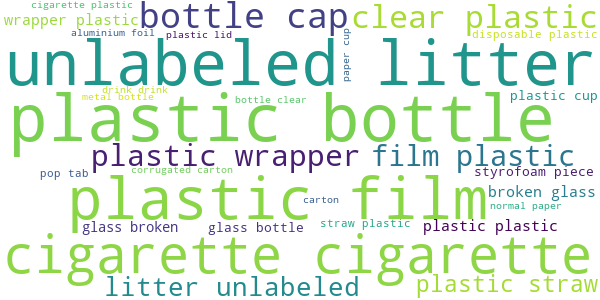

In [17]:
cloud = WordCloud(background_color = "white", 
                  max_words = 30, 
                  contour_width = 5, 
                  width = 600, height = 300, 
                  random_state = 4)

# Process the word cloud
cloud.generate(taco_str)

# Visualize!
cloud.to_image()

### Barplots

Barplots also are a good way to visualize this data, just in a more accurate way.  I will also demonstrate how to find most common words or term frequency in another way through bigrams.

In [19]:
bigram_vectorizer = CountVectorizer(ngram_range = (1,2),
                                    stop_words = "english",
                                    token_pattern = r'\b\w+\b', 
                                    min_df = 1)

bigram_vectorizer

CountVectorizer(ngram_range=(1, 2), stop_words='english',
                token_pattern='\\b\\w+\\b')

In [20]:
analyze = bigram_vectorizer.build_analyzer()
vocab = analyze(taco_str)

vocab[0:10]

['glass',
 'bottle',
 'meal',
 'carton',
 'carton',
 'clear',
 'plastic',
 'bottle',
 'plastic',
 'bottle']

In [60]:
freq = Counter(vocab)
stop_taco = pd.DataFrame(freq.most_common(20), columns = ["Term", "Frequency"])
stop_taco

,Term,Frequency
0,plastic,1915
1,bottle,728
2,cigarette,667
3,plastic bottle,544
4,unlabeled,517
5,litter,517
6,unlabeled litter,517
7,film,451
8,plastic film,451
9,cigarette cigarette,411


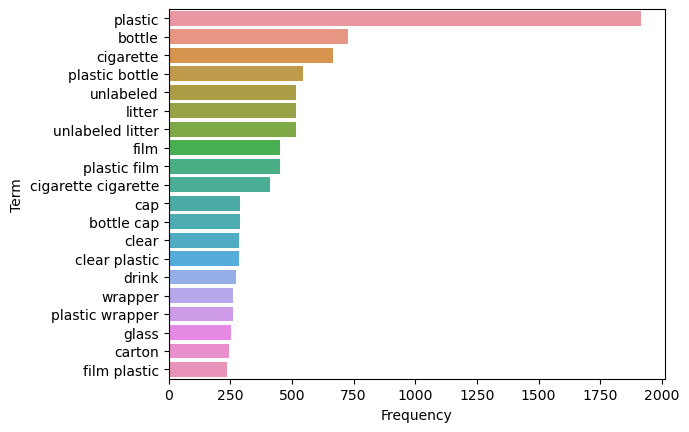

In [61]:
sns.barplot(x = "Frequency",
            y = "Term",
            data = stop_taco,
            orient = "h");

In [23]:
taco_df

,Word,Frequency
0,plastic,1915
1,bottle,728
2,cigarette,667
3,unlabeled,517
4,litter,517
5,film,451
6,cap,289
7,clear,285
8,drink,274
9,wrapper,260


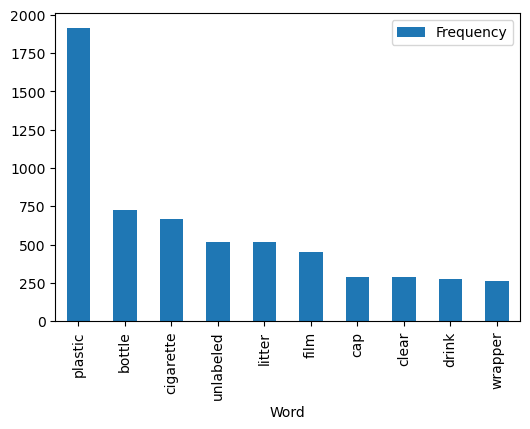

In [24]:
taco_df.plot.bar(x = "Word", y = "Frequency", figsize = (6,4));

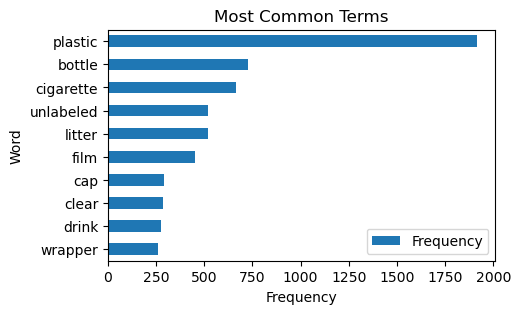

In [25]:
taco_df.plot.barh(x = "Word", y = "Frequency", figsize = (5,3)).invert_yaxis()
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.title("Most Common Terms");

## Thoughts/Discussion

By looking at these tables and visualizations (word cloud and bar plots), it is definite to see that the term "plastic" is the most common word amongst the other terms in the dataset.  Looking at our visualizations, this can mean and be because of many different things.  Compared to the other two barplots, the first barplot demonstrates a visualization of not only single words present in the dataset, but also different terms and phrases that are most common.  In the first twenty most frequent terms analyzed, the word "plastic", is repeated a total of six times.  This being, plastic comes in many different forms and may not even be accounted for in the other tables or graphs.  

Plastic as a concept and object, is a very broad subject as it encompasses many forms and interpretations.  I decided to dive even deeper into analyzing this term through utilizes an even broader and larger dataset to lengthen my understanding into what truly is the main cause of pollution in our environment.  

____

## Data Source/Set #2

The Open Images, a dataset from Google of around 9 million annotated images by computer-based technology and methods.  I decided to analyze this dataset next after collecting information from the first source, TACO.  As the dataset is very large, I took a version with a smaller mass but also included a large dataset that would give me as much information as possible.  I decided to take the train split when subsetting so that I could get the most data when analyzing and therefore, view the patterns more easily.  By analyzing sentences rather than just categories, I will have access to a larger realm of data and knowledge.  

In [32]:
train = pd.read_json(path_or_buf='open_images_train_v6_captions.jsonl', lines=True)

In [33]:
train_caption = train ['caption']

In [34]:
train_caption

0         We can see dolls,book and papers on bed and we...
1         In this picture I can see there is a airplane ...
2         This looks like a black and white poster. I ca...
3         In this image I can see on the left side it is...
4         In this picture I can see group of people sitt...
                                ...                        
507439    There is a lady wearing a tag and holding the ...
507440    In the image we can see there is a newspaper c...
507441    In the picture we can see table with drawers. ...
507442    In this image we can see a girl. In the back t...
507443    In this image we can see so many books on the ...
Name: caption, Length: 507444, dtype: object

## Preprocessing

In [35]:
train_string = train.to_string(index=False)
print(train_string)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [36]:
train_string.split().count("plastic")

1811

In [37]:
train_str = ' '.join(train['caption'].tolist())
train_tok = train_str.split()
train_freq = Counter(train_tok)

train_df = pd.DataFrame(train_freq.most_common(10), columns = ["Word", "Frequency"])
train_df

,Word,Frequency
0,the,1548222
1,a,968611
2,and,822527
3,is,758197
4,see,696540
5,there,671087
6,can,658185
7,In,583193
8,are,453483
9,we,444161


In [38]:
def review_to_words(raw_review): 
    letters_only = re.sub("[^a-zA-Z]", " ", raw_review)   
    words = letters_only.lower().split()  
    stops = set(stopwords.words("english")) 
    meaningful_words = [w for w in words if not w in stops] 
    singles = [stemmer.stem(word) for word in meaningful_words]  
    return( " ".join( singles ))   
 
processed_wmn = [ review_to_words(text) for text in train_caption]  

In [39]:
def build_corpus(data):  
    corpus = []  
    for sentence in data:  
        word_list = sentence.split(" ")  
        corpus.append(word_list)   

    return corpus  
  
corpus = build_corpus(train_caption)   

In [40]:
corpus[0]

['We',
 'can',
 'see',
 'dolls,book',
 'and',
 'papers',
 'on',
 'bed',
 'and',
 'we',
 'can',
 'see',
 'poster',
 'on',
 'a',
 'wall,window',
 'and',
 'curtain,through',
 'this',
 'window',
 'we',
 'can',
 'see',
 'trees.']

## Vectorizing Terms

Because the word "plastic" was most frequent in our last dataset, I decided to focus solely on this term when vectorizing and comparing each point.

In [41]:
model = gensim.models.Word2Vec(corpus, vector_size=100, window=5, min_count=1000, workers=4)  

In [42]:
vocab_len = len(model.wv) 
vocab_len

841

In [43]:
rock_idx = model.wv.key_to_index["plastic"]
rock_idx

592

In [44]:
normed_vector = model.wv.get_vector("plastic", norm=True) 
normed_vector

array([ 0.14300542, -0.02544275,  0.11107991, -0.04736499,  0.01135434,
        0.0860966 , -0.02215564, -0.03745357,  0.00937196,  0.2426322 ,
        0.03058987, -0.10173042,  0.08549244, -0.12387126, -0.04162868,
        0.03785966,  0.11208527,  0.16067407,  0.14551349, -0.02958358,
        0.10499925,  0.16849306, -0.06029978, -0.01495755,  0.00437   ,
        0.12100694, -0.03238588, -0.11163734, -0.0810049 ,  0.00429946,
       -0.19552225, -0.11958937,  0.1145083 ,  0.07889704, -0.09265468,
        0.15947607,  0.05807589,  0.06330577, -0.02146616,  0.12053359,
       -0.02573878, -0.05238374, -0.0380953 , -0.11047868,  0.04526664,
       -0.12194043,  0.15274882,  0.05672224, -0.00581202,  0.04963317,
       -0.10379649,  0.02514341, -0.17013998, -0.02576396, -0.03178317,
        0.08548021, -0.08257731, -0.10827517,  0.11588526,  0.05033428,
       -0.16290793, -0.21399711,  0.06548748, -0.07181757, -0.0785524 ,
       -0.22299996,  0.01257601, -0.18034801,  0.01612518,  0.03

In [45]:
"bottle" in model.wv.key_to_index 

True

## Comparing Terms

In [54]:
model.wv.similarity("plastic", "cardboard")

0.6904356

In [63]:
plastic_words = model.wv.most_similar("plastic", topn=20)
print(type(plastic_words))
plastic_words

<class 'list'>


[('box,', 0.7099931836128235),
 ('cover', 0.7080049514770508),
 ('cardboard', 0.6904356479644775),
 ('box', 0.6577320098876953),
 ('basket', 0.6577079892158508),
 ('boxes,', 0.6321600079536438),
 ('cup,', 0.6239030361175537),
 ('boxes', 0.606782853603363),
 ('bowl,', 0.5978584289550781),
 ('tissue', 0.5918179750442505),
 ('books,', 0.5895571112632751),
 ('bowls,', 0.5730971693992615),
 ('bottle,', 0.5644969344139099),
 ('cups,', 0.5625767111778259),
 ('box.', 0.5541143417358398),
 ('cups', 0.5418116450309753),
 ('papers,', 0.5379080176353455),
 ('bags,', 0.5096758008003235),
 ('book,', 0.5096086859703064),
 ('boxes.', 0.5079923272132874)]

In [64]:
pd.DataFrame(plastic_words,columns=['Word', "Similarity"])

,Word,Similarity
0,"box,",0.709993
1,cover,0.708005
2,cardboard,0.690436
3,box,0.657732
4,basket,0.657708
5,"boxes,",0.632160
6,"cup,",0.623903
7,boxes,0.606783
8,"bowl,",0.597858
9,tissue,0.591818


## Visualizations

Principal Component Analysis (PCA) helps us to look at the variables and see how they correlate with each other.  First let's look at the whole dataset first and then centralize the data around the data frame above that shows words correlated with "plastic".  

In [65]:
features = [model.wv[word] for word in model.wv.index_to_key]

In [66]:
pca = PCA(n_components = 2)
pca_out = pca.fit_transform(features)

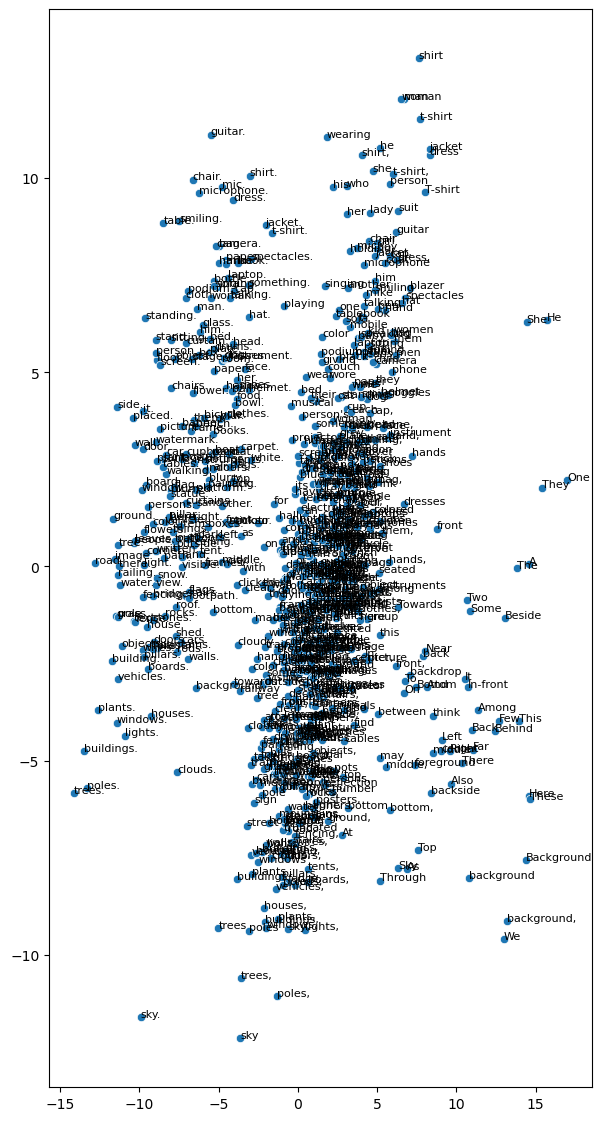

In [67]:
plt.figure(figsize = (7,14))
sns.scatterplot(x=pca_out[:, 0], y=pca_out[:, 1])
words = list(model.wv.index_to_key)

for i, word in enumerate(words[:]):
    plt.annotate(word, size = 8, xy = (pca_out[i, 0], pca_out[i, 1]))
plt.show()

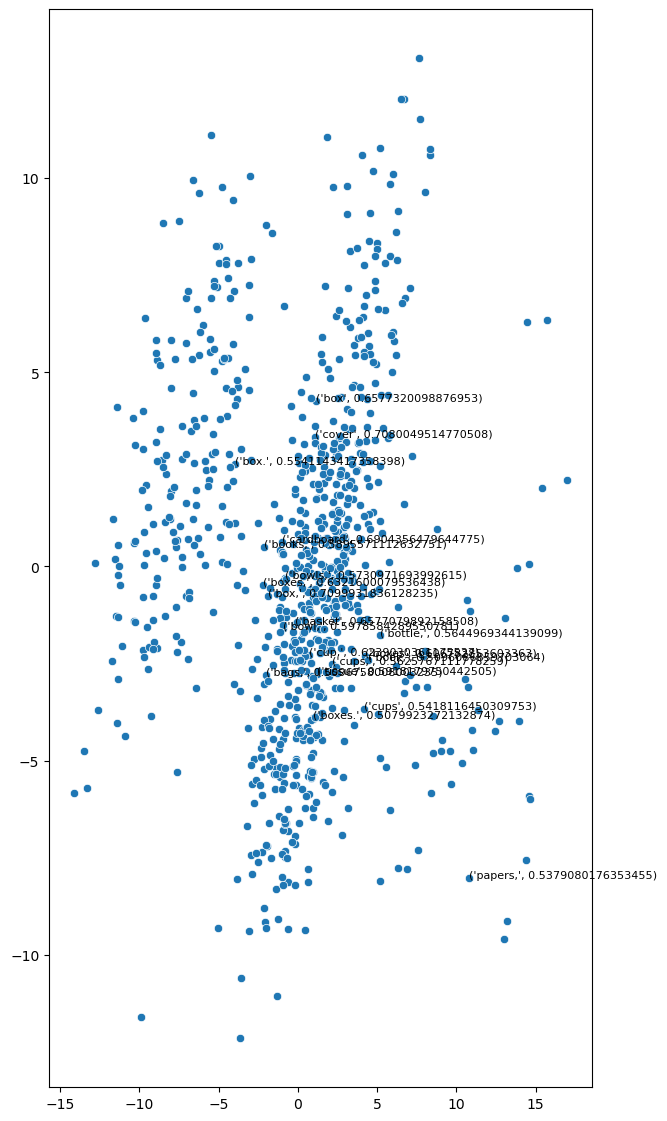

In [68]:
plt.figure(figsize = (7,14))
sns.scatterplot(x=pca_out[:, 0], y=pca_out[:, 1])
words = list(model.wv.index_to_key)

for i, word in enumerate(plastic_words):
    plt.annotate(word, size = 8, xy = (pca_out[i, 0], pca_out[i, 1]))
plt.show()

## Thoughts/Discussion

First looking at the data frame with the terms that we compared in correlation to the word "plastic", it is evident that most words hold around the same amount of similarity and frequency.  I then took the terms to the PCA plot to compare vectorized locations to each other and it seems as though there are a few terms that are repeated or similar to one another.  A lot of these objects are things that we use in our day-to-day lives--i.e. box, bowl, bag.  If you put "plastic" in front of each term, it may be even easier to visualize how common these objects are in our daily lives.  However, compared to the previous dataset results, it is evident that these terms are in relation to more of what is similar to the object of plastics itself, rather than types of plastics or pollution.

____

# Conclusion


Prior to beginning analysis and research for this project, I have always had general assumptions on the matter of pollution through the associated realities of my experiences in school and daily life.  I perceive that a lot of our air pollution comes from car emissions and industrial factory gas release, in which toxic chemicals enter into the atmosphere and pollute all aspects of our global environment.  Littering, intentional or not, has also been a past assumption of mine in which I believe that trash thrown away can go into or is wrongly disposed of in our natural environment like the ocean or natural habitats.  Based on my past assumptions and knowledge, I expected to receive positive data feedback in the form of a large disproportion between different population sizes per object or topic.  This assumption and hypothesis came true as the first dataset posed an evident frequency occurance difference when comparing the terms amongst each other.  With the TACO's dataset results, I came to the conclusion that most of the pollution in our world is objectedly affected by the article/item of plastics.  Not only are we able to see what is most significantly polluting our environment, but we are also able to look at different objects that do negatively affect us.  In addition, we are able to become more aware of what our actions are; because not only are these objects themselves that are harmful, but more importantly, how we deal and dispose of these materials are just as or even more important.  

There is obviously a downfall in the way we analyze the data and what the source limits us to.  The TACO dataset seems to be a corpus of images that contains more objects rather than other forms of pollution like gas or smoke--technical and conceptual ideas.  However, this is evident as the dataset itself is tailored to analyze trash in the public.  This being, the TACO source is only able to help us analyze what objects we litter the most and how we must change our actions.  In addition, applying to both TACO and Open Images, image annotations may cause our data to become limited as it is hard to use this form of data to analyze the general real life situations or realities of our world.  Adding on, the data analysis that I made may have been biased as I connected a few of my past assumptions to my results and what I was looking for.  

I change my research question and objective to look at it from a slightly different perspective.  Rather, this data has helped me to understand ***how image annotations of litter and trash can help us identify most common objects that we wrongly dispose of, and therefore, what objects have a greater impact on pollution as a whole.  From the gathered data, I state that most of our litter comes from plastic objects (beit in bags, boxes, bottles, wrappers, films, etc.), and it is important to be conscious of our actions and how trash can have a greater impact on our environment and the pollution that destroys it.***

Next time I encounter a dataset or project like this, I will first research educational and/or professional papers and sources.  By doing so, I will have accurate information to base my research upon, rather than my personal assumptions or knowledge.  I also believe that it is better to look at the terms at from multiple different perspectives or different types of dataset formats (my skills permit), and gather information that may answer a wide range of questions.  I also wish I was able to find a way to solely isolate a few images to analyze visually and decide the correlation between them based on the the textual annotations.  

Though there are downfalls and lacking aspects of this project, I believe that it represents the effort and skills that I have gained from this class and ways that I can continue to grow in my python knowledge.  I am now more confident in my knowledge and skills of drawing graphs from data through code.  Not only have I consciously gained from this assignment, but I have also intellectually benefitted from this research project.  

I hope that my efforts and intial purpose of this project will be effective in a way that the discussion of the topic of pollution and environmental crisis will bring more awareness to the issues surrounding the health of our globe.  As inhabitants and future ancestors of generations to come, it is necessary to take care of the Earth and be aware of the consequences of our actions.  I believe that as our world continues to advance and emit more toxic gases into the atmosphere, it is important to understand and educate ourselves and one another on the origins of these issues.  To understand how to improve our world and the globe’s state, we need to know where the problems are rooted and where to start.  Therefore, by doing so, we will be able to improve our actions for future generations to come.  



## Works Cited / Sources



Cloud, Saturn. “How to Read CSV Files in a Jupyter Notebook Online.” Saturn Cloud Blog, 17 Oct. 2023, saturncloud.io/blog/how-to-read-csv-files-in-a-jupyter-notebook-online/. 

Kkiller. “Taco-Trash-Dataset.” Kaggle, 13 Aug. 2020, www.kaggle.com/datasets/kneroma/tacotrashdataset. 

Kuznetsova, Alina, et al. “Open Images Dataset V7 and Extensions.” Open Images V7, storage.googleapis.com/openimages/web/index.html. Accessed 14 June 2024. 

Method Matters. “Using Word2vec to Analyze Word Relationships in Python.” Method Matters Blog, 6 Nov. 2017, methodmatters.github.io/using-word2vec-to-analyze-word/. 

Proença, Pedro, and Pedro Simões. “Trash Annotations in Context.” Tacodataset.Org, tacodataset.org/. Accessed 14 June 2024. 

Piskvorky. “Migrating from Gensim 3.x to 4.” GitHub, 7 Sept. 2022, github.com/piskvorky/gensim/wiki/Migrating-from-Gensim-3.x-to-4. 

WHO. “Climate Change.” World Health Organization, World Health Organization, www.who.int/news-room/fact-sheets/detail/climate-change-and-health. Accessed 14 June 2024. 
